In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize as mi
from scipy.integrate import trapezoid as tp

In [ ]:
# http://apmonitor.com/pdc/index.php/Main/TankBlending

# model is
# ReactorV * Ca'  + Ca_in * Vin = Ca_out * Vout
# Vin = Vout = q

def reactor(ca,t,V,q,caf):
    dCadt = (q/V)*(caf - ca)
    return dCadt

In [51]:
def reac(x, plotG):
    Ca0 = 0
    q = 100
    V = 100
    caf = 1

    t = np.linspace(0,60,600)

    # to keep track of ca at each time step 
    ca = np.zeros(len(t))
    ca[0] = Ca0

    # since i have taken full control myself i can set whatever conc at any time t
    # like this

    # this is feed conc
    caf = np.zeros(len(t))

    # we are gonna control o/l conc with pid

    SP = np.ones(len(t)) * 1.5
    # from 50 t SP is set to one
    SP[200:] = 1
    SP[400:] = 0.5

    error = np.zeros(len(t))

    # PID consts
    # kc = 0.9
    # taui = 10.0
    # taud = 5.0
    kc   = x[0]
    taui = x[1]
    taud = x[2]

    Isum = 0
    LastError = 0
    Dsum = 0

    #this implementation does not give us full control over time so .............) 
    #ca = odeint(reactor,Ca0,t,args=(V,q,caf,))

    # now we are gonna integrate one by one ourselves
    for i in range(len(t)-1):
        # now we are gonna control feed conc to reech sp
        error[i] = SP[i] - Ca0
        Isum = Isum + (kc/taui)*error[i]
        Dsum = (kc/taud)*(error[i]-LastError)
        caf[i] = caf[0] + kc*error[i] + Isum + Dsum
        temp = odeint(reactor,Ca0,[t[i],t[i+1]],args=(V,q,caf[i],))
        # set the next initial pt for next time step
        Ca0 = temp[1]
        ca[i+1] = temp[1]
        LastError = error[i]

    if plotG:
        plt.plot(t,ca)
        plt.plot(t,SP,'r--')
        plt.show()
    return abs(tp(ca,t)-tp(SP,t))

In [52]:
x0 = [0.9,10.0,5.0]
bnds = ((0.5,1),(5,15),(0,5))
plotG = False
res = mi(reac, x0, method='Nelder-Mead', bounds=bnds, tol=1e-5, args=(plotG))

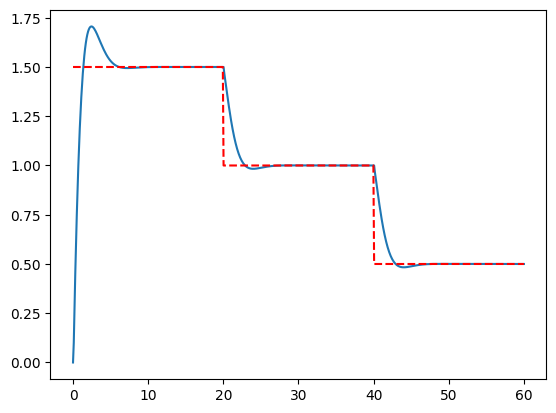

0.6260433314541274

In [55]:
reac(res.x,True)